### Read in Data

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sys
%matplotlib inline

census = pd.read_csv('./census_ml.csv')
census.head()

,year,sample,serial,hhwt,cluster,perwt,nchild,nchild_under_5,nsibs,eldch,sex,age,birthyr,race,educ,ed_var_detailed,occ,occ1950,ed_group_h
0,1960,1960 5%,69847,20,1.960000e+12,20,0 children present,No children under age 5,0 siblings,NaN,Male,43,1916,White,"Grade 5, 6, 7, or 8",Grade 8,775,Operative and kindred workers (nec),1
1,1960,1960 5%,2619724,20,1.960030e+12,20,0 children present,No children under age 5,0 siblings,NaN,Male,28,1931,White,Grade 12,Grade 12,290,"Managers, officials, and proprietors (nec)",2
2,1960,1960 5%,2283283,20,1.960020e+12,20,3,No children under age 5,0 siblings,15,Male,36,1923,White,Grade 10,Grade 10,430,Foremen (nec),1
3,1960,1960 5%,2367708,20,1.960020e+12,20,0 children present,No children under age 5,0 siblings,NaN,Male,48,1912,White,Nursery school to grade 4,Grade 3,290,"Managers, officials, and proprietors (nec)",1
4,1960,1960 5%,508827,20,1.960010e+12,20,2,2,0 siblings,2,Male,27,1932,White,Grade 11,Grade 11,394,Salesmen and sales clerks (nec),1


### Clean continuous variables

In [36]:
census.isnull().sum()

year                   0
sample                 0
serial                 0
hhwt                   0
cluster                0
perwt                  0
nchild                 0
nchild_under_5         0
nsibs                  0
eldch              78438
sex                    0
age                    0
birthyr                0
race                   0
educ                   0
ed_var_detailed        0
occ                    0
occ1950                0
ed_group_h             0
dtype: int64

#### Cleaning census['eldch']

In [37]:
census['eldch'].unique()

array([nan, '15', '2', '21', '12', '13', '11', '29', '17', '16', '14',
       'Less than 1 year old', '38', '8', '3', '10', '1', '5', '6', '9',
       '31', '4', '26', '24', '23', '19', '7', '22', '18', '55', '20',
       '27', '53', '35', '34', '37', '28', '36', '25', '60', '33', '52',
       '68', '39', '49', '32', '50', '56', '30', '41', '57', '44', '47',
       '42', '48', '46', '51', '43', '74', '54', '40', '72', '45', '71',
       '59', '66', '62', '58', '65', '63', '61', '73', '69', '64', '70',
       '67', '87'], dtype=object)

In [38]:
census["eldch"].fillna(0, inplace = True) 


In [40]:
census['eldch'][2]
print(type(census['eldch'][2]))

<class 'str'>


In [41]:
for i in range(88):
    census['eldch'] = np.where((census['eldch'] == str(i)),
                           int(i), census['eldch'])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


In [42]:
census['eldch'][2]
#print(type(census['eldch'][2]))

15

#### Cleaning census['nchild]

In [43]:
census['nchild'].unique()

array(['0 children present', '3', '2', '4', '5', '1 child present', '6',
       '7', '9+', '8'], dtype=object)

In [44]:
census['nchild'] = np.where((census['nchild'] == '0 children present'),
                           0, census['nchild'])

In [45]:
census['nchild'] = np.where((census['nchild'] == '1 child present'),
                           1, census['nchild'])

In [46]:
census['nchild'] = np.where((census['nchild'] == '9+'),
                           11, census['nchild'])

In [47]:
for i in range(12):
    census['nchild'] = np.where((census['nchild'] == str(i)),
                           int(i), census['nchild'])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


#### Cleaning census['nchild_under_5']

In [48]:
census['nchild_under_5'].unique()

array(['No children under age 5', '2', '1 child under age 5', '3', '4',
       '5', '6'], dtype=object)

In [49]:
census['nchild_under_5'] = np.where((census['nchild_under_5'] == 'No children under age 5'),
                           0, census['nchild_under_5'])

census['nchild_under_5'] = np.where((census['nchild_under_5'] == '1 child under age 5'),
                           1, census['nchild_under_5'])

In [50]:
for i in range(7):
    census['nchild_under_5'] = np.where((census['nchild_under_5'] == str(i)),
                           int(i), census['nchild_under_5'])
    print(i)

0
1
2
3
4
5
6


#### Cleaning census['nsibs']

In [51]:
census['nsibs'].unique()

array(['0 siblings', '1 sibling', '4 siblings', '2 siblings',
       '3 siblings', '5 siblings', '6 siblings'], dtype=object)

In [52]:
census['nsibs'] = np.where((census['nsibs'] == '1 sibling'),
                           '1 siblings', census['nsibs'])

In [53]:
for i in range(7):
    census['nsibs'] = np.where((census['nsibs'] == (str(i) + ' siblings')),
                           int(i), census['nsibs'])
    print(i)

0
1
2
3
4
5
6


In [54]:
census.head(6)

,year,sample,serial,hhwt,cluster,perwt,nchild,nchild_under_5,nsibs,eldch,sex,age,birthyr,race,educ,ed_var_detailed,occ,occ1950,ed_group_h
0,1960,1960 5%,69847,20,1.960000e+12,20,0,0,0,0,Male,43,1916,White,"Grade 5, 6, 7, or 8",Grade 8,775,Operative and kindred workers (nec),1
1,1960,1960 5%,2619724,20,1.960030e+12,20,0,0,0,0,Male,28,1931,White,Grade 12,Grade 12,290,"Managers, officials, and proprietors (nec)",2
2,1960,1960 5%,2283283,20,1.960020e+12,20,3,0,0,15,Male,36,1923,White,Grade 10,Grade 10,430,Foremen (nec),1
3,1960,1960 5%,2367708,20,1.960020e+12,20,0,0,0,0,Male,48,1912,White,Nursery school to grade 4,Grade 3,290,"Managers, officials, and proprietors (nec)",1
4,1960,1960 5%,508827,20,1.960010e+12,20,2,2,0,2,Male,27,1932,White,Grade 11,Grade 11,394,Salesmen and sales clerks (nec),1
5,1960,1960 5%,1648147,20,1.960020e+12,20,0,0,0,0,Male,60,1899,White,Grade 12,Grade 12,285,Purchasing agents and buyers (nec),2


#### Cleaning census['age']

In [55]:
census['age'].unique()

array(['43', '28', '36', '48', '27', '60', '63', '69', '44', '54', '73',
       '55', '47', '53', '39', '40', '41', '35', '64', '42', '50', '23',
       '38', '57', '46', '31', '76', '70', '32', '22', '25', '45', '30',
       '65', '52', '49', '67', '26', '37', '58', '77', '62', '61', '78',
       '33', '34', '56', '51', '74', '59', '79', '24', '82', '81', '29',
       '20', '66', '68', '72', '71', '75', '85', '21', '93', '19', '80',
       '88', '84', '90 (90+ in 1980 and 1990)', '18', '83', '86', '87',
       '17', '91', '16', '92', '94', '15', '98', '89', '14',
       '100 (100+ in 1960-1970)', '95', '97', '96', '99'], dtype=object)

In [56]:
census['age'] = np.where((census['age'] == "90 (90+ in 1980 and 1990)"),
                           '90', census['age'])

census['age'] = np.where((census['age'] == "100 (100+ in 1960-1970)"),
                           '100', census['age'])

In [57]:
for i in range(101):
    census['age'] = np.where((census['age'] == str(i)),
                           int(i), census['age'])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [58]:
census.head(1)

,year,sample,serial,hhwt,cluster,perwt,nchild,nchild_under_5,nsibs,eldch,sex,age,birthyr,race,educ,ed_var_detailed,occ,occ1950,ed_group_h
0,1960,1960 5%,69847,20,1.960000e+12,20,0,0,0,0,Male,43,1916,White,"Grade 5, 6, 7, or 8",Grade 8,775,Operative and kindred workers (nec),1


#### Drop unnnecessary variables

In [59]:
census.drop(['year', 'sample', 'serial', 'hhwt', 'cluster', 'perwt', 'birthyr', 'occ'], axis=1, inplace=True)

In [60]:
census.head(5)

,nchild,nchild_under_5,nsibs,eldch,sex,age,race,educ,ed_var_detailed,occ1950,ed_group_h
0,0,0,0,0,Male,43,White,"Grade 5, 6, 7, or 8",Grade 8,Operative and kindred workers (nec),1
1,0,0,0,0,Male,28,White,Grade 12,Grade 12,"Managers, officials, and proprietors (nec)",2
2,3,0,0,15,Male,36,White,Grade 10,Grade 10,Foremen (nec),1
3,0,0,0,0,Male,48,White,Nursery school to grade 4,Grade 3,"Managers, officials, and proprietors (nec)",1
4,2,2,0,2,Male,27,White,Grade 11,Grade 11,Salesmen and sales clerks (nec),1


#### Cleaning census['race']

In [61]:
census['race'].unique()

array(['White'], dtype=object)

In [62]:
census['sex'].unique()

array(['Male', 'Female'], dtype=object)

<Figure size 432x288 with 0 Axes>

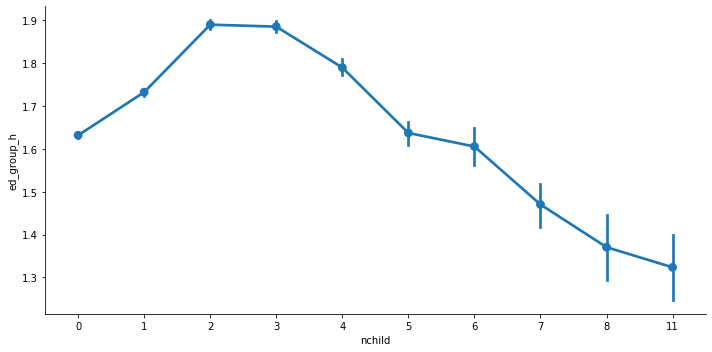

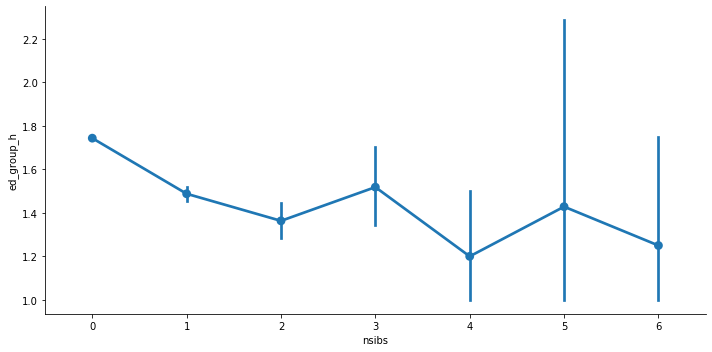

In [63]:
for i, col in enumerate(['nchild', 'nsibs']):
    plt.figure(i)
    sns.catplot(x=col, y='ed_group_h', data=census, kind='point', aspect=2, )

In [64]:
census.isnull().sum()

nchild             0
nchild_under_5     0
nsibs              0
eldch              0
sex                0
age                0
race               0
educ               0
ed_var_detailed    0
occ1950            0
ed_group_h         0
dtype: int64

In [65]:
gender_num = {'Male': 0, 'Female': 1}

census['sex'] = census['sex'].map(gender_num)

In [66]:
census.head(5)

,nchild,nchild_under_5,nsibs,eldch,sex,age,race,educ,ed_var_detailed,occ1950,ed_group_h
0,0,0,0,0,0,43,White,"Grade 5, 6, 7, or 8",Grade 8,Operative and kindred workers (nec),1
1,0,0,0,0,0,28,White,Grade 12,Grade 12,"Managers, officials, and proprietors (nec)",2
2,3,0,0,15,0,36,White,Grade 10,Grade 10,Foremen (nec),1
3,0,0,0,0,0,48,White,Nursery school to grade 4,Grade 3,"Managers, officials, and proprietors (nec)",1
4,2,2,0,2,0,27,White,Grade 11,Grade 11,Salesmen and sales clerks (nec),1


In [67]:
census['sex'].unique()

array([0, 1], dtype=int64)

#### Cleaning census['educ']

In [69]:
census['ed_var_detailed'].unique()

array(['Grade 8', 'Grade 12', 'Grade 10', 'Grade 3', 'Grade 11',
       'Grade 2', 'Grade 4', '4 years of college', 'Grade 9', 'Grade 7',
       '2 years of college', '1 year of college',
       '6 years of college (6+ in 1960-1970)', 'Grade 6',
       '5+ years of college', 'Grade 5', 'No schooling completed',
       'Grade 1', 'Some college, but less than 1 year',
       '3 years of college', 'Kindergarten'], dtype=object)

In [70]:
census['ed_var_detailed'].unique()

array(['Grade 8', 'Grade 12', 'Grade 10', 'Grade 3', 'Grade 11',
       'Grade 2', 'Grade 4', '4 years of college', 'Grade 9', 'Grade 7',
       '2 years of college', '1 year of college',
       '6 years of college (6+ in 1960-1970)', 'Grade 6',
       '5+ years of college', 'Grade 5', 'No schooling completed',
       'Grade 1', 'Some college, but less than 1 year',
       '3 years of college', 'Kindergarten'], dtype=object)

In [ ]:
educ_num = {'Grade 8': 8, 
            'Grade 12':12,
            'Grade 10':10,
            'Grade 3': 3,
            'Grade 11': 11,
            'Grade 2': 2,
            'Grade 4': 4,
            '4 years of college': 16,
            'Grade 9': 9,
            'Grade 7': 7,
            '2 years of college': 14,
            '1 year of college': 13,
            '6 years of college (6+ in 1960-1970)': 18,
            'Grade 6': 6,
            '5+ years of college': 18,
            'Grade 5': 5,
            'No schooling completed': 5,
            'Grade 1': 1,
            'Some college, but less than 1 year': 13,
            '3 years of college' : 15 }

In [71]:
census.dtypes

nchild             object
nchild_under_5     object
nsibs              object
eldch              object
sex                 int64
age                object
race               object
educ               object
ed_var_detailed    object
occ1950            object
ed_group_h          int64
dtype: object

## TODO: Convert columns from object into int types. 

https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int


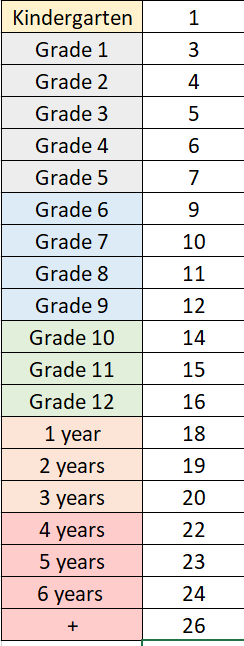